#Chapter 5 How to Clean Text Manually and with NLTK


##Manual Tokenization

###Load Data

In [ ]:
# Load data
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

###Split by Whitespace

Running the example splits the document into a long list of words and prints the first 100 for
us to review. We can see that punctuation is preserved (e.g. wasn’t and armour-like), which is
nice. We can also see that end of sentence punctuation is kept with the last word (e.g. thought.),
which is not great.


In [ ]:
# Split into words by white space
words = text.split()
print(words[:100])

['\ufeffOne', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


###Select Words

Again, running the example we can see that we get our list of words. This time, we can see
that armour-like is now two words armour and like (fine) but contractions like What’s is also
two words What and s (not great)


In [ ]:
import re
# split based on the word only
words = re.split(r'\W+', text)
words[:100]

['',
 'One',
 'morning',
 'when',
 'Gregor',
 'Samsa',
 'woke',
 'from',
 'troubled',
 'dreams',
 'he',
 'found',
 'himself',
 'transformed',
 'in',
 'his',
 'bed',
 'into',
 'a',
 'horrible',
 'vermin',
 'He',
 'lay',
 'on',
 'his',
 'armour',
 'like',
 'back',
 'and',
 'if',
 'he',
 'lifted',
 'his',
 'head',
 'a',
 'little',
 'he',
 'could',
 'see',
 'his',
 'brown',
 'belly',
 'slightly',
 'domed',
 'and',
 'divided',
 'by',
 'arches',
 'into',
 'stiff',
 'sections',
 'The',
 'bedding',
 'was',
 'hardly',
 'able',
 'to',
 'cover',
 'it',
 'and',
 'seemed',
 'ready',
 'to',
 'slide',
 'off',
 'any',
 'moment',
 'His',
 'many',
 'legs',
 'pitifully',
 'thin',
 'compared',
 'with',
 'the',
 'size',
 'of',
 'the',
 'rest',
 'of',
 'him',
 'waved',
 'about',
 'helplessly',
 'as',
 'he',
 'looked',
 'What',
 's',
 'happened',
 'to',
 'me',
 'he',
 'thought',
 'It',
 'wasn',
 't',
 'a',
 'dream',
 'His']

###Split by Whitespace and Remove Punctuation

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


We can use regular expressions to select for the punctuation characters and use the sub()
function to replace them with nothing. For example:

In [ ]:
re_punc = re.compile('[%s]' %re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('',w) for w in words]

In [ ]:
stripped[:100]

['',
 'One',
 'morning',
 'when',
 'Gregor',
 'Samsa',
 'woke',
 'from',
 'troubled',
 'dreams',
 'he',
 'found',
 'himself',
 'transformed',
 'in',
 'his',
 'bed',
 'into',
 'a',
 'horrible',
 'vermin',
 'He',
 'lay',
 'on',
 'his',
 'armour',
 'like',
 'back',
 'and',
 'if',
 'he',
 'lifted',
 'his',
 'head',
 'a',
 'little',
 'he',
 'could',
 'see',
 'his',
 'brown',
 'belly',
 'slightly',
 'domed',
 'and',
 'divided',
 'by',
 'arches',
 'into',
 'stiff',
 'sections',
 'The',
 'bedding',
 'was',
 'hardly',
 'able',
 'to',
 'cover',
 'it',
 'and',
 'seemed',
 'ready',
 'to',
 'slide',
 'off',
 'any',
 'moment',
 'His',
 'many',
 'legs',
 'pitifully',
 'thin',
 'compared',
 'with',
 'the',
 'size',
 'of',
 'the',
 'rest',
 'of',
 'him',
 'waved',
 'about',
 'helplessly',
 'as',
 'he',
 'looked',
 'What',
 's',
 'happened',
 'to',
 'me',
 'he',
 'thought',
 'It',
 'wasn',
 't',
 'a',
 'dream',
 'His']

Sometimes text data may contain non-printable characters. We can use a similar approach to
filter out all non-printable characters by selecting the inverse of the string.printable constant.

In [ ]:
re_print = re.compile('[^%s]' %re.escape(string.printable))
result = [re_print.sub('', w) for w in words]
result[:100]

['',
 'One',
 'morning',
 'when',
 'Gregor',
 'Samsa',
 'woke',
 'from',
 'troubled',
 'dreams',
 'he',
 'found',
 'himself',
 'transformed',
 'in',
 'his',
 'bed',
 'into',
 'a',
 'horrible',
 'vermin',
 'He',
 'lay',
 'on',
 'his',
 'armour',
 'like',
 'back',
 'and',
 'if',
 'he',
 'lifted',
 'his',
 'head',
 'a',
 'little',
 'he',
 'could',
 'see',
 'his',
 'brown',
 'belly',
 'slightly',
 'domed',
 'and',
 'divided',
 'by',
 'arches',
 'into',
 'stiff',
 'sections',
 'The',
 'bedding',
 'was',
 'hardly',
 'able',
 'to',
 'cover',
 'it',
 'and',
 'seemed',
 'ready',
 'to',
 'slide',
 'off',
 'any',
 'moment',
 'His',
 'many',
 'legs',
 'pitifully',
 'thin',
 'compared',
 'with',
 'the',
 'size',
 'of',
 'the',
 'rest',
 'of',
 'him',
 'waved',
 'about',
 'helplessly',
 'as',
 'he',
 'looked',
 'What',
 's',
 'happened',
 'to',
 'me',
 'he',
 'thought',
 'It',
 'wasn',
 't',
 'a',
 'dream',
 'His']

###Normalizing case

It is common to convert all words to one case. This means that the vocabulary will shrink in
size, but some distinctions are lost (e.g. Apple the company vs apple the fruit is a commonly
used example). We can convert all words to lowercase by calling the lower() function on each
word.

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words by white space
words = text.split()
# convert to lower case
words = [word.lower() for word in words]
print(words[:100])

['\ufeffone', 'morning,', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'he', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'the', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'his', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"what\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'it', "wasn't", 'a', 'dream.', 'his', 'room,', 'a', 'proper', 'human']


##Tokenization and Cleaning with NLTK

###Install NLTK

In [ ]:
!pip install -U nltk

     |████████████████████████████████| 1.4MB 4.6MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=e92fa0e9635f10dd11c57a0a66292ab4c71f598ca5977d7de604c195260f80d9
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

###Split into Sentences

In [ ]:
from nltk import sent_tokenize
#load data
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
#Split into tokens
sentences = sent_tokenize(text)
sentences[0]

LookupError: ignored

##Split into Words

In [ ]:
from nltk.tokenize import word_tokenize
# load data
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
tokens[0:100]

LookupError: ignored

##Filter Out Punctuations

In [ ]:
from nltk.tokenize import word_tokenize
# load data
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
words[0:100]

##Filter out Stop Words (and Pipeline)

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

Let's write whole concept under a single umbrella

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# load data
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

##Stem Words

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
# load data
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
tokens = word_tokenize(text)
# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(wor) for word in tokens]
stemmed[:100]

#**Chapter 6: How to Prepare Text Data with scikit-learn**

The following topic will be covered in this chapter:
1. CountVectorizer
2. TfidfVectorizer
3. HashingVectorizer

##Words Counts with *CountVectorizer*

In [ ]:
import nltk
nltk.download()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."] 
# create the transform
vectorizer = CountVectorizer()
#tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

##Word Frequencies with TfidfVectorizer
  
*   **Term Frequency**: This summarizes how often a given word appears within a document.
*   **Inverse Document Frequency**: This downscales words that appear a lot across document

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
        "The dog.",
        "The fox"]
# create the transform
vectorizer = TfidfVectorizer()
#tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encode vector
print(vector.shape)
print(vector.toarray())

##**Hashing** with *HashingVectorizer*

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

#**Chapter 7: How to Prepare Text Data With Keras**



1.   Split words with text_to_word_sequence.
2.   Encoding with one_hot.
3.   Hash Encoding with hashing_trick.
4.   Tokenizer API.



##7.2 Split Words with text_to_word_sequence


By default, this function automatically does 3 things:
*   Splits words by space
*   Filters out punctuation
*   Converts text to lowercase


In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown! %^&fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

##7.3 Encoding with one_hot

We can use the text to word sequence() function from the previous section to split the document into words and then use a set to represent only the unique words in the document.
The size of this set can be used to estimate the size of the vocabulary for one document.

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)

We can put this together with the **one_hot()** function and encode the words in the document. The vocabulary size is increased by one-third to minimize collisions when hashing words.

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document 
result = one_hot(text, round(vocab_size*1.3))
print(result)

##Hash Encoding with ***hashing_trick***

In [ ]:
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy fog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
print(result)

##Tokenizer ***API***

In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

Once fit, the Tokenizer provides 4 attributes that you can use to query what has been
learned about your documents:

*   **word counts:** A dictionary of words and their counts.

*   **word docs:** A dictionary of words and how many documents each appeared in.

*   **word index:** A dictionary of words and their uniquely assigned integers.

*   **document count:** An integer count of the total number of documents that were used to fit the
Tokenizer.






In [ ]:
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

Once the **Tokenizer** has been fit on training data, it can be used to encode documents in the train or test datasets. The **texts_to_matrix()** function on the **Tokenizer** can be used to create one vector per document provided per input. The length of the vector is the total size of the vocabulary.
Thw modes available include:


1.   **Binary:** Whether or not each word is present in the document. This is the default.

2.   **Count:** The count of each word in the document

3.   **tfidf:** The Text Frequency-Inverse DocumentFrequency (TF-IDF) scoring for each word
in the document.

4.   **freq:** The frequency of each word as a ratio of words within each document





In [ ]:
from keras.preprocessing.text import Tokenizer
# define 5 document
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

#**Chapter 8: The Bags-of-Words Model**

##8.3 What is a Bag-of-Words?
Step1: Collect Data

Step 2: Design the Vocabulary

Step 3: Create Document Vectors



##8.6 **Scoring Words**

*   **Counts.** Count the number of times each word appears in a document.
*   **Frequencies.** Calculate the frequency that each word appears in a document out of all
the words in the document.

8.6.1: **Word Hashing**

8.6.2: **TFIDF**


* **Term Frequency:** is a scoring of the frequency of the word in the current document.
* **Inverse Document Frequency:** is a scoring of how rare the word is across documents.









#**Chapter 9: How to Prepare Movie Review Data for Sentiment Analysis**

 After completing this tutorial, you
will know:
* How to load text data and clean it to remove punctuation and other non-words.
* How to develop a vocabulary, tailor it, and save it to file.
* How to prepare movie reviews using cleaning and a pre-defined vocabulary and save them
to new files ready for modeling.


##**9.1 Tutorial Overview**

This tutorial is divided into the following parts:



1.   Movie Review Dataset

2.   Load Text Data

3.   Clean Text Data

4.   Develop Vocabulary

5.   Save Prepared Data





##**9.2 Movie Review Dataset**

You can download the dataset from here:
 Movie Review Polarity Dataset (review polarity.tar.gz, 3MB).
http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.
gz


##**9.3 Load Text Data**

In [ ]:
# load one file
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg/cv000_29416.txt'
# open the file as read only
file = open(filename, 'r')
# read all text
text = file.read()
# close the file
file.close()

This loads the document as ASCII and preserves any white space, like new lines. We can
turn this into a function called load doc() that takes a filename of the document to load and
returns the text.

In [ ]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text

We have two directories each with 1,000 documents each. We can process each directory in
turn by first getting a list of files in the directory using the listdir() function, then loading
each file in turn. For example, we can load each document in the negative directory using the
load doc() function to do the actual loading.


In [ ]:
from os import listdir

# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text

# specify directory to load
directory = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg'
# walk through all files in the folder
for filename in listdir(directory):
  # skip files that do not have the right extension
  if not filename.endswith(".txt"):
    next 
  # create the path of the file to open
  path = directory + '/' + filename
  # load document
  doc = load_doc(path)
  print('Loaded %s' % filename)

We can turn the processing of the documents into a function as well and use it as a template
later for developing a function to clean all documents in a folder. For example, below we define
a process docs() function to do the same thing.

In [ ]:
from os import listdir
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# load all docs in a directory
def process_docs(directory):
  # walk through all files in the folder
  for filename in listdir(directory):
  # skip files that do not have the right extension
    if not filename.endswith(".txt"):
      next
    # create the full path of the file to open
    path = directory + '/' + filename
    # load document
    doc = load_doc(path)
    print('Loaded %s' % filename)
# specify directory to load
directory = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg'
process_docs(directory)

##**9.4 Clean Text Data**

**9.4.1 Split into Tokens**

First, let’s load one document and look at the raw tokens split by white space. We will use the
**load doc()** function developed in the previous section. We can use the **split()** function to
split the loaded document into tokens separated by white space.

In [ ]:
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# load the document
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg/cv000_29416.txt'
text = load_doc(filename)
# split into tokens by white space
tokens = text.split()
print(tokens)

Just looking at the raw tokens can give us a lot of ideas of things to try, such as:


*   Remove punctuation from words (e.g. ‘what’s’).

*   Removing tokens that are just punctuation (e.g. ‘-’).

*   Removing tokens that contain numbers (e.g. ‘10/10’).

*   Remove tokens that have one character (e.g. ‘a’).

*   Remove tokens that don’t have much meaning (e.g. ‘and’).

Some ideas:

*   We can filter out punctuation from tokens using **regular expressions**.

*   We can remove tokens that are just punctuation or contain numbers by using an **isalpha()**
check on each token.

*   We can remove English stop words using the list loaded using **NLTK**.


*   We can filter out short tokens by checking their length.


Below is an updated version of cleaning this review:



In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
import string
import re

# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text

# load the document
directory = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg/cv000_29416.txt'
text = load_doc(directory)
# split the tokens by white space
tokens = text.split()
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
tokens = [re_punc.sub('', word) for word in tokens]
# remove the remaining toens that are not alphanumeric
tokens = [word for word in tokens if word.isalpha()]
# filter out stopwards
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
# filter out short tokens
tokens = [word for word in tokens if len(word)>1]
print(tokens)

We can put this into a function called **clean doc()** and test it on another review, this time
a **positive review**.

In [ ]:
from nltk.corpus import stopwords
import string
import re
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
# turn a doc into clean tokens
def clean_doc(doc):
  # split into tokens by white space
  tokens = doc.split()
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens
# load the document
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

##**9.5 Develop Vocabulary**




We can keep track of the vocabulary in a Counter, which is a dictionary of words and their
count with some additional convenience functions. We need to develop a new function to process
a document and add it to the vocabulary. The function needs to load a document by calling the
previously developed load doc() function. It needs to clean the loaded document using the
previously developed clean doc() function, then it needs to add all the tokens to the Counter,
and update counts. We can do this last step by calling the update() function on the counter
object. Below is a function called add doc to vocab() that takes as arguments a document
filename and a Counter vocabulary

In [ ]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
  # load doc
  doc = load_doc(filename)
  # clean doc
  tokens = clean_doc(doc)
  # update counts
  vocab.update(tokens)

Finally, we can use our template above for processing all documents in a directory called
**process_docs()** and update it to call **add_doc_to_vocab()**.

In [ ]:
# load all docs in a directory
def process_docs(directory, vocab):
  # walk through all files in the folder
  for filename in listdir(directory):
    # skip files that do not have the right extensions
    if not filename.endswith(".txt"):
      next
    # create the full path of the file to open
    path = directory + '/' + filename
    # add doc to vocab
    add_doc_to_vocab(path, vocab)

We can put all of this together and develop a full vocabulary from all documents in the
dataset.

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
      # skip files that do not have the right extension
      if not filename.endswith(".txt"):
        next
      # create the full path of the file to open
      path = directory + '/' + filename
      # add doc to vocab
      add_doc_to_vocab(path, vocab)

# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab)
process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

Perhaps the least common words, those that only appear once across all reviews, are not
predictive. Perhaps some of the most common words are not useful too. Generally, words that
only appear once or a few times across 2,000 reviews are probably not predictive and can be
removed from the vocabulary. We can do
this by stepping through words and their counts and only keeping those with a count above a
chosen threshold. Here we will use 5 occurrences.

In [ ]:
# keep token with >5 occurrence
min_occurance = 5
tokens = [k for k,c in vocab.items() if c >= min_occurance]
print(len(tokens))

This reduces the vocabulary from 46,557 to 14,803 words, a huge drop. Perhaps a minimum
of 5 occurrences is too aggressive; you can experiment with different values. We can then save
the chosen vocabulary of words to a new file. I like to save the vocabulary as ASCII with one
word per line. Below defines a function called save list() to save a list of items, in this case,
tokens to file, one per line.

In [ ]:
def save_list(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w')
  file.write(data)
  file.close()

The complete example for defining and saving the vocabulary is listed below.

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip files that do not have the right extension
        if not filename.endswith(".txt"):
           next
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

# save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab)
process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))
# keep tokens with > 5 occurrence
min_occurane = 5
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))
# save tokens to a vocabulary file
save_list(tokens, '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/vocab.txt')

##**9.6 Save Prepared Data**

The complete code listing is provided below.

In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
      # skip files that do not have the right extension
      if not filename.endswith(".txt"):
        next
      # create the full path of the file to open
      path = directory + '/' + filename
      # load and clean the doc
      line = doc_to_line(path, vocab)
      # add to list
      lines.append(line)
    return lines

# load vocabulary
vocab_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# prepare negative reviews
negative_lines = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab)
save_list(negative_lines, '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/negative.txt')
# prepare positive reviews
positive_lines = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab)
save_list(positive_lines, '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/positive.txt')

#**Chapter 10: Project: Develop a Neural Bag-of-Words Model for Sentiment Analysis**

After completing this tutorial, you will know:


*   How to prepare the review text data for modeling with a restricted vocabulary.
*   How to use the bag-of-words model to prepare train and test data.

*   How to develop a Multilayer Perceptron bag-of-words model and use it to make predictions
on new review text data.







##**10.1 Tutorial Overview**
This tutorial is divided into the following parts:
1. Movie Review Dataset
2. Data Preparation
3. Bag-of-Words Representation
4. Sentiment Analysis Models
5. Comparing Word Scoring Methods
6. Predicting Sentiment for New Reviews

##**10.2 Movie Review Dataset**

*  Movie Review Polarity Dataset (review polarity.tar.gz, 3MB).
http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.
gz


##**10.3 Data Preparation**

1. Separation of data into training and test sets.
2. Loading and cleaning the data to remove punctuation and numbers.
3. Defining a vocabulary of preferred words.

##**10.3.1 Split into Train and Test Sets**

This is a 90% train, 10% split of the data.

##**10.3.2 Loading and Cleaning Reviews**

* Split tokens on white space.
* Remove all punctuation from words.
* Remove all words that are not purely comprised of alphabetical characters.
* Remove all words that are known stop words.
* Remove all words that have a length ≤ 1 character.

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
import string
import re
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load the document
filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

##**10.3.3 Define a Vocabulary**

It is important to define a vocabulary of known words when using a bag-of-words model. The
more words, the larger the representation of documents, therefore it is important to constrain
the words to only those believed to be predictive. This is difficult to know beforehand and often
it is important to test different hypotheses about how to construct a useful vocabulary.

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
      # skip any reviews in the test set
      if filename.startswith('cv9'):
        continue
      # create the full path of the file to open
      path = directory + '/' + filename
      # add doc to vocab
      add_doc_to_vocab(path, vocab)
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab)
process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

Pulling all of this together, the complete example is listed below.

In [ ]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)
# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()

# define vocab
vocab = Counter()

# add all docs to vocab
process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab)
process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))

# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

##**10.4 Bag-of-Words Representation**

In this section, we will look at how we can convert each review into a representation that we
can provide to a Multilayer Perceptron model. A bag-of-words model is a way of extracting
features from text so the text input can be used with machine learning algorithms like neural
networks.


 This section is divided into 2 steps:
1. Converting reviews to lines of tokens.
2. Encoding reviews with a bag-of-words model representation.

##**10.4.1 Reviews to Lines of Tokens**

The complete example is listed below, demonstrating how to prepare the
positive and negative reviews from the training dataset.

In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines
# load and clean a dataset
def load_clean_dataset(vocab):
    # load documents
    neg = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab)
    pos = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels
# load the vocabulary
vocab_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
docs, labels = load_clean_dataset(vocab)
# summarize what we have
print(len(docs), len(labels))

##**10.4.2 Movie Reviews to Bag-of-Words Vectors**


We will use the Keras API to convert reviews to encoded document vectors. The Tokenizer class is convenient and will easily transform documents into encoded vectors. First, the Tokenizer must be created, then fit on the text documents
in the training dataset. In this case, these are the aggregation of the positive lines and
negative lines arrays developed in the previous section.

In [ ]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab, is_train)
    pos = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
# load the vocabulary
vocab_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')
print(Xtrain.shape, Xtest.shape)

##**10.5 Sentiment Analysis Models**

In this section, we will develop Multilayer Perceptron (MLP) models to classify encoded
documents as either positive or negative. The models will be simple feedforward network models with fully connected layers called Dense in the Keras deep learning library. This section is
divided into 3 sections:

1. First sentiment analysis model
2. Comparing word scoring modes
3. Making a prediction for new reviews

###**10.5.1 First Sentiment Analysis Model**

The complete example is listed below.

In [ ]:
import string
import numpy as np
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab, is_train)
    pos = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

# load the vocabulary
vocab_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = np.array(tokenizer.texts_to_matrix(train_docs, mode='freq'))
Xtest = np.array(tokenizer.texts_to_matrix(test_docs, mode='freq'))
# define the model
n_words = Xtest.shape[1]
model = define_model(n_words)
# fit network
model.fit(np.array(Xtrain, dtype='float64'), np.array(ytrain, dtype='float64'), epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(np.array(Xtest, dtype='float64'), np.array(ytest, dtype='float64'), verbose=0)
print('Test Accuracy: %f' % (acc*100))

##**10.6 Comparing Word Scoring Methods**

We are now going to evaluate the performance of the 4 different word scoring methods.
Pulling all of this together, the complete example is listed below.

In [ ]:
import string
import numpy as np
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from pandas import DataFrame
from matplotlib import pyplot
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)
# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
    # create the full path of the file to open
    path = directory + '/' + filename
    # load and clean the doc
    line = doc_to_line(path, vocab)
    # add to list
    lines.append(line)
    return lines
# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab, is_train)
    pos = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels
# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest
# load the vocabulary
vocab_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(np.array(Xtrain,dtype='float64'), np.array(ytrain,dtype='float'), np.array(Xtest,dtype='float'), np.array(ytest,dtype='float64'))
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()

##**10.7 Predicting Sentiment for New Reviews**




Predicting the sentiment of new reviews involves following the same steps used to prepare
the test data. Specifically, loading the text, cleaning the document, filtering tokens by the
chosen vocabulary, converting the remaining tokens to a line, encoding it using the Tokenizer,
and making a prediction. We can make a prediction of a class value directly with the fit model
by calling predict() that will return an integer of 0 for a negative review and 1 for a positive
review. All of these steps can be put into a new function called predict sentiment() that
requires the review text, the vocabulary, the tokenizer, and the fit model and returns the
predicted sentiment and an associated percentage or confidence-like output.

In [ ]:
import nltk
import numpy as np
nltk.download('stopwords')
import string
import re
from os import listdir
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
    # create the full path of the file to open
      path = directory + '/' + filename
      # load and clean the doc
      line = doc_to_line(path, vocab)
      # add to list
      lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab):
    # load documents
    neg = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab)
    pos = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
      return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

# load the vocabulary
vocab_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab)
test_docs, ytest = load_clean_dataset(vocab)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='binary')
# define network
n_words = Xtrain.shape[1]
model = define_model(n_words)     
# fit network
model.fit(np.array(Xtrain, dtype='float64'), np.array(ytrain, dtype='float64'), epochs=10, verbose=2)
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                653650    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 653,701
Trainable params: 653,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
51/51 - 0s - loss: 0.4683 - accuracy: 0.7716
Epoch 2/10
51/51 - 0s - loss: 0.0806 - accuracy: 0.9913
Epoch 3/10
51/51 - 0s - loss: 0.0247 - accuracy: 1.0000
Epoch 4/10
51/51 - 0s - loss: 0.0107 - accuracy: 1.0000
Epoch 5/10
51/51 - 0s - loss: 0.0057 - accuracy: 1.0000
Epoch 6/10
51/51 - 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 7/10
51/51 - 0s - loss: 0.0024 - accuracy: 1.0000

#**Part V Word Embeddings**

**Chapter 11
The Word Embedding Model**




#**Chapter 12 How to Develop Word Embeddings with Gensim**

Word embeddings are a modern approach for representing text in natural language processing.
Embedding algorithms like Word2Vec and GloVe are key to the state-of-the-art results achieved
by neural network models on natural language processing problems like machine translation.
In this tutorial, you will discover how to train and load word embedding models for natural
language processing applications in Python using Gensim. After completing this tutorial, you
will know:

* How to train your own Word2Vec word embedding model on text data.
* How to visualize a trained word embedding model using Principal Component Analysis.
* How to load pre-trained Word2Vec and GloVe word embedding models from Google and
Stanford.

##**12.1 Tutorial Overview**
This tutorial is divided into the following parts:
1. Word Embeddings
2. Gensim Library
3. Develop Word2Vec Embedding
4. Visualize Word Embedding
5. Load Google’s Word2Vec Embedding
6. Load Stanford’s GloVe Embedding


##**12.2 Word Embeddings**

A word embedding is an approach to provide a dense vector representation of words that capture
something about their meaning. Word embeddings are an improvement over simpler bag-of-word
model word encoding schemes like word counts and frequencies that result in large and sparse
vectors (mostly 0 values) that describe documents but not the meaning of the words.

   Word embeddings work by using an algorithm to train a set of fixed-length dense and
continuous-valued vectors based on a large corpus of text. Each word is represented by a
point in the embedding space and these points are learned and moved around based on the
words that surround the target word. It is defining a word by the company that it keeps that
allows the word embedding to learn something about the meaning of words. The vector space
representation of the words provides a projection where words with similar meanings are locally
clustered within the space.

  The use of word embeddings over other text representations is one of the key methods that
has led to breakthrough performance with deep neural networks on problems like machine
translation. In this tutorial, we are going to look at how to use two different word embedding
methods called Word2Vec by researchers at Google and GloVe by researchers at Stanford.

##**12.3 Gensim Python Library**

Gensim is an open source Python library for natural language processing, with a focus on topic
modeling. It is billed as “topic modeling for humans”. Gensim was developed and is maintained
by the Czech natural language processing researcher Radim Rehurek and his company RaRe
Technologies. It is not an everything-including-the-kitchen-sink NLP research library (like
NLTK); instead, Gensim is a mature, focused, and efficient suite of NLP tools for topic modeling.
Most notably for this tutorial, it supports an implementation of the Word2Vec word embedding
for learning new word vectors from text.


It also provides tools for loading pre-trained word embeddings in a few formats and for
making use and querying a loaded embedding. We will use the Gensim library in this tutorial.
Gensim can be installed easily using pip or easy install. For example, you can install Gensim
with pip by typing the following on your command line:


In [ ]:
!pip install gensim

##**12.4 Develop Word2Vec Embedding**

Word2Vec is one algorithm for learning a word embedding from a text corpus. There are two
main training algorithms that can be used to learn the embedding from text; they are Continuous
Bag-of-Words (CBOW) and skip grams. 

 Gensim provides the
Word2Vec class for working with a Word2Vec model.


There are many parameters on this constructor; a few noteworthy arguments you may
wish to configure are:
* size: (default 100) The number of dimensions of the embedding, e.g. the length of the
dense vector to represent each token (word).
* window: (default 5) The maximum distance between a target word and words around the
target word.
* min count: (default 5) The minimum count of words to consider when training the model;
words with an occurrence less than this count will be ignored.
* workers: (default 3) The number of threads to use while training.
* sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).


In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

##**12.5 Visualize Word Embedding**

After you learn word embedding for your text data, it can be nice to explore it with visualization.
You can use classical projection methods to reduce the high-dimensional word vectors to twodimensional plots and plot them on a graph. The visualizations can provide a qualitative
diagnostic for your learned model.

###**12.5.1 Plot Word Vectors Using PCA**

[[-0.00788266 -0.01642513]
 [ 0.00031284 -0.00812224]
 [-0.0031435  -0.01019156]
 [ 0.01674983  0.00287382]
 [ 0.00410513  0.00561506]
 [-0.00069731 -0.00159713]
 [ 0.00164515 -0.00633078]
 [-0.0005942  -0.00353954]
 [-0.00413411 -0.00503733]
 [ 0.00578829  0.01553079]
 [-0.01899787  0.00572339]
 [-0.01304885  0.00960203]
 [-0.00036064  0.01652364]
 [ 0.02025789 -0.00462501]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


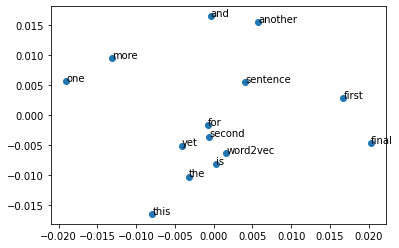

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
print(result)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
   pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

###**12.6 Load Google’s Word2Vec Embedding**

Training your own word vectors may be the best approach for a given NLP problem. But it
can take a long time, a fast computer with a lot of RAM and disk space, and perhaps some
expertise in finessing the input data and training algorithm. An alternative is to simply use an
existing pre-trained word embedding. Along with the paper and code for Word2Vec, Google
also published a pre-trained Word2Vec model on the Word2Vec Google Code Project.


A pre-trained model is nothing more than a file containing tokens and their associated word
vectors. The pre-trained Google Word2Vec model was trained on Google news data (about 100
billion words); it contains 3 million words and phrases and was fit using 300-dimensional word
vectors. It is a 1.53 Gigabyte file. You can download it from here:

 GoogleNews-vectors-negative300.bin.gz.
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

We can put all of this together as follows.

In [ ]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

##**12.7 Load Stanford’s GloVe Embedding**

#**Chapter 13 How to Learn and Load Word Embeddings in Keras**

Word embeddings provide a dense representation of words and their relative meanings. They are
an improvement over sparse representations used in simpler bag of word model representations.
Word embeddings can be learned from text data and reused among projects. They can also be
learned as part of fitting a neural network on text data. In this tutorial, you will discover how
to use word embeddings for deep learning in Python with Keras. After completing this tutorial,
you will know:

* About word embeddings and that Keras supports word embeddings via the Embedding
layer.
* How to learn a word embedding while fitting a neural network.
* How to use a pre-trained word embedding in a neural network.


##**13.1 Tutorial Overview**
This tutorial is divided into the following parts:
1. Word Embedding
2. Keras Embedding Layer
3. Example of Learning an Embedding
4. Example of Using Pre-Trained GloVe Embedding
5. Tips for Cleaning Text for Word Embedding

##**13.2 Word Embedding**

The position of a word in the learned vector space is referred to as its embedding.


Two popular examples of methods of learning word embeddings from text include:
* Word2Vec.
* GloVe.

##**13.3 Keras Embedding Layer**


The Embedding layer is initialized with random weights and will learn an embedding for all
of the words in the training dataset. It is a flexible layer that can be used in a variety of ways,
such as:

* It can be used alone to learn a word embedding that can be saved and used in another
model later.

* It can be used as part of a deep learning model where the embedding is learned along
with the model itself.

* It can be used to load a pre-trained word embedding model, a type of transfer learning.


The Embedding layer is defined as the first hidden layer of a network. It must specify 3
arguments:

* input dim: This is the size of the vocabulary in the text data. For example, if your data
is integer encoded to values between 0-10, then the size of the vocabulary would be 11
words.

* output dim: This is the size of the vector space in which words will be embedded. It
defines the size of the output vectors from this layer for each word. For example, it could
be 32 or 100 or even larger. Test different values for your problem.

* input length: This is the length of input sequences, as you would define for any input
layer of a Keras model. For example, if all of your input documents are comprised of 1000
words, this would be 1000.


For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer
encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be
embedded, and input documents that have 50 words each.

In [ ]:
#e = Embedding(200, 32, input_length=50)

##**13.4 Example of Learning an Embedding**


First, we will define the documents and their class labels.


In [ ]:
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

Next, we can integer encode each document. This means that as input the Embedding layer
will have sequences of integers. We could experiment with other more sophisticated bag of word
model encoding like **counts** or **TF-IDF**. Keras provides the one **hot()** function that creates a
hash of each word as an efficient integer encoding. We will estimate the vocabulary size of 50,
which is much larger than needed to reduce the probability of collisions from the hash function.

In [ ]:
# integer encode the documents
from keras.preprocessing.text import one_hot
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[36, 23], [32, 44], [17, 45], [11, 44], [21], [14], [29, 45], [14, 32], [29, 44], [2, 48, 23, 22]]


The sequences have different lengths and Keras prefers inputs to be vectorized and all inputs
to have the same length. We will **pad** all input sequences to have the length of 4. Again, we can do this with a built in Keras function, in this case the **pad_sequences()** function.

In [ ]:
# pad documents to a max length of 4 words
from keras.preprocessing.sequence import pad_sequences
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs), type(padded_docs)

[[36 23  0  0]
 [32 44  0  0]
 [17 45  0  0]
 [11 44  0  0]
 [21  0  0  0]
 [14  0  0  0]
 [29 45  0  0]
 [14 32  0  0]
 [29 44  0  0]
 [ 2 48 23 22]]


(None, numpy.ndarray)

We are now ready to define our **Embedding layer** as part of our neural network model.
The Embedding layer has a vocabulary of **50** and an input length of 4. We will choose a
small embedding space of 8 dimensions. The model is a simple binary classification model.
Importantly, the output from the Embedding layer will be 4 vectors of 8 dimensions each, one
for each word. We flatten this to a one 32-element vector to pass on to the Dense output layer.

In [ ]:
# define the model
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


Finally, we can fit and evaluate the classification model.

In [ ]:
# fit the model
labels = np.array(labels)
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


The complete code listing is provided below.

In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[36, 23], [32, 44], [17, 45], [11, 44], [21], [14], [29, 45], [14, 32], [29, 44], [2, 48, 23, 22]]
[[36 23  0  0]
 [32 44  0  0]
 [17 45  0  0]
 [11 44  0  0]
 [21  0  0  0]
 [14  0  0  0]
 [29 45  0  0]
 [14 32  0  0]
 [29 44  0  0]
 [ 2 48 23 22]]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
Accuracy: 89.999998


##**13.5 Example of Using Pre-Trained GloVe Embedding**


The Keras Embedding layer can also use a word embedding learned elsewhere.  It is common
in the field of Natural Language Processing to learn, save, and make freely available word
embeddings. For example, the researchers behind GloVe method provide a suite of pre-trained
word embeddings on their website released under a public domain license.

The smallest package of embeddings is 822 Megabytes, called glove.6B.zip. It was trained
on a dataset of one billion tokens (words) with a vocabulary of 400 thousand words. There
are a few different embedding vector sizes, including 50, 100, 200 and 300 dimensions.

Keras provides a **Tokenizer** class that can be fit on the
training data, can convert text to sequences consistently by calling the **texts_to_sequences()**
method on the **Tokenizer** class, and provides access to the dictionary mapping of words to
integers in a **word_index** attribute.


In [ ]:
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

Next, we need to load the entire **GloVe** word embedding file into memory as a dictionary of
word to embedding array.

In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

FileNotFoundError: ignored

We can do that by enumerating all unique words in the **Tokenizer.word** index and
locating the embedding weight vector from the loaded GloVe embedding. The result is a matrix
of weights only for words we will see during training.

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
embedding_vector = embeddings_index.get(word)
if embedding_vector is not None:
embedding_matrix[i] = embedding_vector

We chose the **100-dimensional** version, therefore the Embedding layer must be defined with output dim set to **100**. Finally, we do not want to update the learned word weights in this model, therefore we will set the trainable attribute for the model to be **False**.

The complete worked example is listed below.

In [ ]:
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
values = line.split()
word = values[0]
coefs = asarray(values[1:], dtype='float32')
embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
embedding_vector = embeddings_index.get(word)
if embedding_vector is not None:
embedding_matrix[i] = embedding_vector
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten()
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

#**Part VI Text Classification**



#**Chapter 14: Neural Models for Document Classification**


##**14.1 Overview**
This tutorial is divided into the following parts:
1. Word Embeddings + CNN = Text Classification
2. Use a Single Layer CNN Architecture
3. Dial in CNN Hyperparameters
4. Consider Character-Level CNNs
5. Consider Deeper CNNs for Classification

#***Chapter 15 Project: Develop an Embedding + CNN Model for Sentiment Analysis***

##**15.1 Tutorial Overview**
This tutorial is divided into the following parts:
1. Movie Review Dataset
2. Data Preparation
3. Train CNN With Embedding Layer
4. Evaluate Model

##**15.2 Movie Review Dataset**

* Movie Review Polarity Dataset (review polarity.tar.gz, 3MB).
http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.
gz


##**15.3 Data Preparation**
Note: The preparation of the movie review dataset was first described in Chapter 9. In this
section, we will look at 3 things:
1. Separation of data into training and test sets.
2. Loading and cleaning the data to remove punctuation and numbers.
3. Defining a vocabulary of preferred words.

##15.4 Train CNN With Embedding Layer

In [ ]:
import string
import re
from os import listdir
from numpy import array
from keras import models
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc, vocab):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out tokens not in vocab
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens
# load all docs in a directory
def process_docs(directory, vocab, is_train):
    documents = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load the doc
        doc = load_doc(path)
        # clean doc
        tokens = clean_doc(doc, vocab)
        # add to list
        documents.append(tokens)
    return documents

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', vocab, is_train)
    pos = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

# load the vocabulary
vocab_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load training data
train_docs, ytrain = load_clean_dataset(vocab, True)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)
# define model
model = define_model(vocab_size, max_length)
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=1)
# save the model
model.save('model.h5')
model.summary()

Vocabulary size: 13060
Maximum length: 1224
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1224, 100)         1306000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1217, 32)          25632     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 608, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 19456)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                194570    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,526,213
Trainable params: 1,526,213
Non-trainable params: 0


##**15.5 Evaluate Model**

In this section, we will evaluate the trained model and use it to make predictions on new data.
First, we can use the built-in evaluate() function to estimate the skill of the model on both
the training and test dataset. This requires that we load and encode both the training and test
datasets.

In [ ]:
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)
Xtest = encode_docs(tokenizer, max_length, test_docs)

Vocabulary size: 13060
Maximum length: 1224


We can then load the model and evaluate it on both datasets and print the accuracy.

In [ ]:
# load the model
model = models.load_model('model.h5')
# evaluate model on training dataset
_, acc = model.evaluate(Xtrain, ytrain, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluate model on test dataset
_, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 100.000000
Test Accuracy: 97.000003


New data must then be prepared using the same text encoding and encoding schemes as was
used on the training dataset. Once prepared, a prediction can be made by calling the predict()
function on the model. The function below named predict sentiment() will encode and pad
a given movie review text and return a prediction in terms of both the percentage and a label.

In [ ]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, max_length, model):
    # clean review
    line = clean_doc(review, vocab)
    # encode and pad review
    padded = encode_docs(tokenizer, max_length, [line])
    # predict sentiment
    yhat = model.predict(padded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

## Test Model

In [ ]:
# test positive text
text = 'Everyone will enjoy this film. I love it, recommended!'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie. Do not watch it. It sucks.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [Everyone will enjoy this film. I love it, recommended!]
Sentiment: NEGATIVE (59.373%)
Review: [This is a bad movie. Do not watch it. It sucks.]
Sentiment: NEGATIVE (60.713%)


#**Chapter 16 Project: Develop an n-gram CNN Model for Sentiment Analysis**

##**16.3.4 Complete Example**

In [ ]:
import nltk
nltk.download('stopwords')
import string
import re
from os import listdir
from nltk.corpus import stopwords
from pickle import dump
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    tokens = ' '.join(tokens)
    return tokens
# load all docs in a directory
def process_docs(directory, is_train):
    documents = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load the doc
        doc = load_doc(path)
        # clean doc
        tokens = clean_doc(doc)
        # add to list
        documents.append(tokens)
    return documents
# load and clean a dataset
def load_clean_dataset(is_train):
      # load documents
      neg = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/neg', is_train)
      pos = process_docs('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/txt_sentoken/pos', is_train)
      docs = neg + pos
      # prepare labels
      labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
      return docs, labels
# save a dataset to file
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)
# load and clean all reviews
train_docs, ytrain = load_clean_dataset(True)
test_docs, ytest = load_clean_dataset(False)
# save training datasets
save_dataset([train_docs, ytrain], '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/train.pkl')
save_dataset([test_docs, ytest], '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/test.pkl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Saved: /content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/train.pkl
Saved: /content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/test.pkl


##**16.4 Develop Multichannel Model**

###**16.4.2 Define Model**

In Keras, a multiple-input model can be defined using the functional API. We will define a
model with three input channels for processing 4-grams, 6-grams, and 8-grams of movie review
text. Each channel is comprised of the following elements:

* Input layer that defines the length of input sequences.
* Embedding layer set to the size of the vocabulary and 100-dimensional real-valued representations.
* Conv1D layer with 32 filters and a kernel size set to the number of words to read at once.
* MaxPooling1D layer to consolidate the output from the convolutional layer.
* Flatten layer to reduce the three-dimensional output to two dimensional for concatenation.

In [ ]:
from pickle import load
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
# calculate the maximum document length
def max_length(lines):
    return max([len(s.split()) for s in lines])
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded
# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 100)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 100)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 100)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='model.png')
    return model
# load training dataset
trainLines, trainLabels = load_dataset('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/train.pkl')
# create tokenizer
tokenizer = create_tokenizer(trainLines)
# calculate max document length
length = max_length(trainLines)
print('Max document length: %d' % length)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, trainLines, length)
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([np.array(trainX, dtype='float64'),np.array(trainX, dtype='float64'),np.array(trainX, dtype='float64')], np.array(trainLabels), epochs=7, batch_size=16)
# save the model
model.save('model.h5')

Max document length: 1380
Vocabulary size: 40852
Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 1380)]       0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 1380)]       0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 1380)]       0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1380, 100)    4085200     input_10[0][0]                   
______________________________________

##**16.5 Evaluate Model**

In [ ]:
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
# calculate the maximum document length
def max_length(lines):
    return max([len(s.split()) for s in lines])
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded
# load datasets
trainLines, trainLabels = load_dataset('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/train.pkl')
testLines, testLabels = load_dataset('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/Review_moving_polarity/test.pkl')
# create tokenizer
tokenizer = create_tokenizer(trainLines)
# calculate max document length
length = max_length(trainLines)
print('Max document length: %d' % length)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, trainLines, length)
testX = encode_text(tokenizer, testLines, length)
# load the model
model = load_model('model.h5')
# evaluate model on training dataset
_, acc = model.evaluate([trainX,trainX,trainX], np.array(trainLabels), verbose=0)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset dataset
_, acc = model.evaluate([testX,testX,testX], np.array(testLabels), verbose=0)
print('Test Accuracy: %.2f' % (acc*100))

Max document length: 1380
Vocabulary size: 40852
Train Accuracy: 100.00
Test Accuracy: 95.00


#**Part VII Language Modeling**
#**Chapter 17 Neural Language Modeling**

#**Chapter 18 How to Develop a Character-Based Neural Language Model**

A language model predicts the next word in the sequence based on the specific words that have
come before it in the sequence. It is also possible to develop language models at the character
level using neural networks. The benefit of character-based language models is their small
vocabulary and flexibility in handling any words, punctuation, and other document structure.
This comes at the cost of requiring larger models that are slower to train. Nevertheless, in the
field of neural language models, character-based models offer a lot of promise for a general,
flexible and powerful approach to language modeling. In this tutorial, you will discover how to
develop a character-based neural language model. After completing this tutorial, you will know:

* How to prepare text for character-based language modeling.
* How to develop a character-based language model using LSTMs.
* How to use a trained character-based language model to generate text.

##**18.1 Tutorial Overview**
This tutorial is divided into the following parts:
1. Sing a Song of Sixpence
2. Data Preparation
3. Train Language Model
4. Generate Text

##**18.3.6 Complete Example**

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
# load text
raw_text = load_doc('/content/drive/My Drive/Colab Notebooks/NLP/Text Files/rhyme.txt')
print(raw_text)
# clean
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(len(raw_text))
# organize into sequences of characters
length = 10
sequences = list()
for i in range(length, len(raw_text)):
    # select sequence of tokens
    seq = raw_text[i-length:i+1]
    # store
    sequences.append(seq)
print('Total Sequences: %d' % len(sequences))
# save sequences to file
out_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/char_sequences.txt'
save_doc(sequences,out_filename)

Sing a song of sixpence,
A pocket full of rye.
Four and twenty blackbirds,
Baked in a pie.

When the pie was opened
The birds began to sing;
Wasn't that a dainty dish,
To set before the king.

The king was in his counting house,
Counting out his money;
The queen was in the parlour,
Eating bread and honey.

The maid was in the garden,
Hanging out the clothes,
When down came a blackbird
And pecked off her nose.
409
Total Sequences: 399


##**18.4 Train Language Model**

###**18.4.1 Load Data**

In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# load
in_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/char_sequences.txt'
raw_text = load_doc(in_filename)
#print(raw_text)
lines = raw_text.split('\n')
lines

['Sing a song',
 'ing a song ',
 'ng a song o',
 'g a song of',
 ' a song of ',
 'a song of s',
 ' song of si',
 'song of six',
 'ong of sixp',
 'ng of sixpe',
 'g of sixpen',
 ' of sixpenc',
 'of sixpence',
 'f sixpence,',
 ' sixpence, ',
 'sixpence, A',
 'ixpence, A ',
 'xpence, A p',
 'pence, A po',
 'ence, A poc',
 'nce, A pock',
 'ce, A pocke',
 'e, A pocket',
 ', A pocket ',
 ' A pocket f',
 'A pocket fu',
 ' pocket ful',
 'pocket full',
 'ocket full ',
 'cket full o',
 'ket full of',
 'et full of ',
 't full of r',
 ' full of ry',
 'full of rye',
 'ull of rye.',
 'll of rye. ',
 'l of rye. F',
 ' of rye. Fo',
 'of rye. Fou',
 'f rye. Four',
 ' rye. Four ',
 'rye. Four a',
 'ye. Four an',
 'e. Four and',
 '. Four and ',
 ' Four and t',
 'Four and tw',
 'our and twe',
 'ur and twen',
 'r and twent',
 ' and twenty',
 'and twenty ',
 'nd twenty b',
 'd twenty bl',
 ' twenty bla',
 'twenty blac',
 'wenty black',
 'enty blackb',
 'nty blackbi',
 'ty blackbir',
 'y blackbird',
 ' black

##**18.4.2 Encode Sequences**

The sequences of characters must be encoded as integers. This means that each unique character
will be assigned a specific integer value and each sequence of characters will be encoded as a
sequence of integers. We can create the mapping given a sorted set of unique characters in the
raw input data. The mapping is a dictionary of character values to integer values.

In [ ]:
chars = sorted(list(set(raw_text)))
mapping = dict((c, i) for i, c in enumerate(chars))

Next, we can process each sequence of characters one at a time and use the dictionary
mapping to look up the integer value for each character.

In [ ]:
sequences = list()
for line in lines:
    # integer encode line
    encoded_seq = [mapping[char] for char in line]
    # store
    sequences.append(encoded_seq)

The result is a list of integer lists. We need to know the size of the vocabulary later. We can
retrieve this as the size of the dictionary mapping.

In [ ]:
# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 38


###**18.4.3 Split Inputs and Output**

Now that the sequences have been integer encoded, we can separate the columns into input and
output sequences of characters. We can do this using a simple array slice.

In [ ]:
import numpy as np
sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
sequences[0:5], X[0:5], y[0:5]

(array([[12, 23, 27, 21,  1, 15,  1, 32, 28, 27, 21],
        [23, 27, 21,  1, 15,  1, 32, 28, 27, 21,  1],
        [27, 21,  1, 15,  1, 32, 28, 27, 21,  1, 28],
        [21,  1, 15,  1, 32, 28, 27, 21,  1, 28, 20],
        [ 1, 15,  1, 32, 28, 27, 21,  1, 28, 20,  1]]),
 array([[12, 23, 27, 21,  1, 15,  1, 32, 28, 27],
        [23, 27, 21,  1, 15,  1, 32, 28, 27, 21],
        [27, 21,  1, 15,  1, 32, 28, 27, 21,  1],
        [21,  1, 15,  1, 32, 28, 27, 21,  1, 28],
        [ 1, 15,  1, 32, 28, 27, 21,  1, 28, 20]]),
 array([21,  1, 28, 20,  1]))

We can
use the to categorical() function in the Keras API to one hot encode the input and output
sequences.

In [ ]:
import numpy as np
from keras.utils import to_categorical
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size)

###**18.4.4 Fit Model**

In [ ]:
from numpy import array
from pickle import dump
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# define the model
def define_model(X):
    model = Sequential()
    model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

###**18.4.5 Save Model**

In [ ]:
# save the model to file
model.save('model.h5')

###**18.4.6 Complete Example**
Tying all of this together, the complete code listing for fitting the character-based neural
language model is listed below.

In [ ]:
from numpy import array
from pickle import dump
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# define the model
def define_model(X):
    model = Sequential()
    model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

# load
in_filename = '/content/drive/My Drive/Colab Notebooks/NLP/Text Files/char_sequences.txt'
raw_text = load_doc(in_filename)
lines = raw_text.split('\n')

# integer encode sequences of characters
chars = sorted(list(set(raw_text)))
mapping = dict((c, i) for i, c in enumerate(chars))
sequences = list()

for line in lines:
    # integer encode line
    encoded_seq = [mapping[char] for char in line]
    # store
    sequences.append(encoded_seq)
    # vocabulary size
    vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = array(sequences)
y = to_categorical(y, num_classes=vocab_size)

# define model
model = define_model(X)

# fit model
model.fit(X, y, epochs=100, verbose=2)

# save the model to file
model.save('model.h5')

# save the mapping
dump(mapping, open('mapping.pkl', 'wb'))

Vocabulary Size: 38
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 75)                34200     
_________________________________________________________________
dense_1 (Dense)              (None, 38)                2888      
Total params: 37,088
Trainable params: 37,088
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 - 0s - loss: 3.6200 - accuracy: 0.1003
Epoch 2/100
13/13 - 0s - loss: 3.5178 - accuracy: 0.1905
Epoch 3/100
13/13 - 0s - loss: 3.2400 - accuracy: 0.1905
Epoch 4/100
13/13 - 0s - loss: 3.0602 - accuracy: 0.1905
Epoch 5/100
13/13 - 0s - loss: 3.0106 - accuracy: 0.1905
Epoch 6/100
13/13 - 0s - loss: 2.9843 - accuracy: 0.1905
Epoch 7/100
13/13 - 0s - loss: 2.9666 - accuracy: 0.1905
Epoch 8/100
13/13 - 0s - loss: 2.9444 - accuracy: 0.1905
Epoch 9/100
13/13 - 0s - loss: 2.922

##**18.5 Generate Text**

###**18.5.1 Load Model**

The first step is to load the model saved to the file model.h5. We can use the load model()
function from the Keras API.

In [ ]:
# load the model
model = load_model('model.h5')

We also need to load the pickled dictionary for mapping characters to integers from the file
mapping.pkl. We will use the Pickle API to load the object.

In [ ]:
# load the mapping
mapping = load(open('mapping.pkl','rb'))

###**18.5.2 Generate Characters**

We must provide sequences of 10 characters as input to the model in order to start the generation
process. We will pick these manually. A given input sequence will need to be prepared in the
same way as preparing the training data for the model. First, the sequence of characters must
be integer encoded using the loaded mapping.


In [ ]:
# encode the charactersas integers
in_text = 'Sing a son'
encoded = [mapping[char] for char in in_text]
encoded

[12, 23, 27, 21, 1, 15, 1, 32, 28, 27]

Next, the integers need to be one hot encoded using the to categorical() Keras function.
We also need to reshape the sequence to be 3-dimensional, as we only have one sequence and
LSTMs require all input to be three dimensional (samples, time steps, features).

In [ ]:
# one hot encode
encoded = to_categorical(encoded, num_classes=len(mapping))
encoded = encoded.reshape(1, encoded.shape[0], encoded.shape[1])

We can then use the model to predict the next character in the sequence. We use
predict_classes() instead of predict() to directly select the integer for the character with
the highest probability instead of getting the full probability distribution across the entire set of
characters.

In [ ]:
# predict character
yhat = model.predict_classes(encoded, verbose=0)
yhat

array([21])

We can then decode this integer by looking up the mapping to see the character to which it
maps

In [ ]:
out_char = ''
for char, index in mapping.items():
    if index == yhat:
        out_char = char
        break

This character can then be added to the input sequence. We then need to make sure that the
input sequence is 10 characters by truncating the first character from the input sequence text.
We can use the pad sequences() function from the Keras API that can perform this truncation
operation. Putting all of this together, we can define a new function named generate seq()
for using the loaded model to generate new sequences of text.

In [ ]:
# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
  in_text = seed_text
  # generate a fixed number of characters
  for _ in range(n_chars):
    # encode the characters as integers
    encoded = [mapping[char] for char in in_text]
    # truncate sequence to a fixed length
    encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
    #one hot encode
    encoded = to_categorical(encoded, num_classes=len(mapping))
    encoded = encoded.reshape(1, encoded.shape[0], encoded.shape[1])
    # predict charater
    yhat = model.predict_classes(encoded, verbose=0)
    #reverse map integer to character
    out_char = ' '
    for char, index in mapping.items():
      if index == yhat:
        out_char = char
        break
    # append to input
    in_text +=char
    return in_text

In [ ]:
from keras.preprocessing.sequence import pad_sequences

mapping = mapping
print(len(mapping))
seq_length = 10
seed_text = 'Sing a son' 
n_chars = 20
in_text = seed_text
# generate a fixed number of characters
for _ in range(n_chars):
  # encode the characters as integers
  encoded = [mapping[char] for char in in_text]
  # truncate sequence to a fixed length
  encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
  #one hot encode
  encoded = to_categorical(encoded, num_classes=len(mapping))
  encoded = encoded.reshape(1, encoded.shape[1], encoded.shape[2])
  # predict charater
  yhat = model.predict_classes(encoded, verbose=0)
  #reverse map integer to character
  out_char = ' '
  for char, index in mapping.items():
    if index == yhat:
      out_char = char
      break
  # append to input
  in_text +=char

38


###**18.5.3 Complete Example**
Tying all of this together, the complete example for generating text using the fit neural language
model is listed below.

In [ ]:
from pickle import load
from keras.models import load_model
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
    in_text = seed_text
    # generate a fixed number of characters
    for _ in range(n_chars):
        # encode the characters as integers
        encoded = [mapping[char] for char in in_text]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # one hot encode
        encoded = to_categorical(encoded, num_classes=len(mapping))
        encoded = encoded.reshape(1, encoded.shape[1], encoded.shape[2])
        # predict character
        yhat = model.predict_classes(encoded, verbose=0)
        # reverse map integer to character
        out_char = ''
        for char, index in mapping.items():
            if index == yhat:
                out_char = char
                break
        # append to input
        in_text += out_char
    return in_text

# load the model
model = load_model('model.h5')
# load the mapping
mapping = load(open('mapping.pkl', 'rb'))
# test start of rhyme
print(generate_seq(model, mapping, 10, 'Sing a son', 20))
# test mid-line
print(generate_seq(model, mapping, 10, 'The birds began', 20))
# test not in original
print(generate_seq(model, mapping, 10, 'When down came', 20))

Sing a song of sixpence, A poc
The birds began to sing; Wasn't tha
When down came a blackbird And pec


#**Chapter 19 How to Develop a Word-Based Neural Language Model**

##**19.1 Tutorial Overview**
This tutorial is divided into the following parts:
1. Framing Language Modeling
2. Jack and Jill Nursery Rhyme
3. Model 1: One-Word-In, One-Word-Out Sequences
4. Model 2: Line-by-Line Sequence
5. Model 3: Two-Words-In, One-Word-Out Sequence

##**19.3 Jack and Jill Nursery Rhyme**

In [ ]:
# source text
data = """ Jack and Jill went up the hill\n
To fetch a pail of water\n
Jack fell down and broke his crown\n
And Jill came tumbling after\n """
data

' Jack and Jill went up the hill\n\nTo fetch a pail of water\n\nJack fell down and broke his crown\n\nAnd Jill came tumbling after\n '

##**19.4 Model 1: One-Word-In, One-Word-Out Sequences**

We can start with a very simple model. Given one word as input, the model will learn to predict
the next word in the sequence.

In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = array(encoded)
        # predict a word in the vocabulary
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result
# define the model
def define_model(vocab_size):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model
# source text
data = """Jack and Jill went up the hill\n
          To fetch a pail of water\n
          Jack fell down and broke his crown\n
          And Jill came tumbling after\n """
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# split into X and y elements
sequences = array(sequences)
X, y = sequences[:,0],sequences[:,1]
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)
# define model
model = define_model(vocab_size)
# fit network
model.fit(X, y, epochs=500, verbose=2)
# evaluate
print(generate_seq(model, tokenizer, 'Jack', 6))

##**19.5 Model 2: Line-by-Line Sequence**

#**Part VIII   Image Captioning**

#**Chapter 21: Neural Image Caption Generation**

#**Chapter 26 Project: Develop a Neural   Image Caption Generation Model**

##**26.1 Tutorial Overview**
This tutorial is divided into the following parts:
1. Photo and Caption Dataset
2. Prepare Photo Data
3. Prepare Text Data
4. Develop Deep Learning Model
5. Evaluate Model
6. Generate New Captions

##**26.2 Photo and Caption Dataset**

You can use the link below to request
the dataset:

* Dataset Request Form.
https://illinois.edu/fb/sec/1713398
Within a short time, you will receive an email that contains links to two files:
* Flickr8k Dataset.zip (1 Gigabyte) An archive of all photographs.
* Flickr8k text.zip (2.2 Megabytes) An archive of all text descriptions for photographs.

* Flicker8k Dataset: Contains 8092 photographs in JPEG format (yes the directory name
spells it ‘Flicker’ not ‘Flickr’).
* Flickr8k text: Contains a number of files containing different sources of descriptions for
the photographs.

##**26.3 Prepare Photo Data**

In [ ]:
from os import listdir
from os import path
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model